In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [2]:
img_height, img_width = 180,180

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                              target_size = (img_height,img_width),
                                              class_mode = 'categorical',
                                              batch_size=16)

Found 47454 images belonging to 35 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                              target_size=(img_height,img_width),
                                              class_mode='categorical',
                                              batch_size=16)

Found 14321 images belonging to 35 classes.


In [5]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                 input_shape=(180,180,3),
                                                 pooling='avg', classes=2,
                                                 weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Dense(35, activation='softmax'))

In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 35)                71715     
                                                                 
Total params: 23,659,427
Trainable params: 71,715
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
resnet_model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

C:\Users\karma\.conda\envs\FarmwiseAI\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
epochs= 8
history = resnet_model.fit(training_set, validation_data=test_set, epochs=epochs)

Epoch 1/8
2966/2966 [==============================] - 11004s 4s/step - loss: 3.6621 - accuracy: 0.1635 - auc: 0.7273 - precision: 0.4642 - recall: 0.0495 - true_positives: 2350.0000 - val_loss: 4.3603 - val_accuracy: 0.1561 - val_auc: 0.6997 - val_precision: 0.3414 - val_recall: 0.0383 - val_true_positives: 549.0000
Epoch 2/8
2966/2966 [==============================] - 13180s 4s/step - loss: 3.1416 - accuracy: 0.2528 - auc: 0.8002 - precision: 0.5208 - recall: 0.1171 - true_positives: 5556.0000 - val_loss: 4.2624 - val_accuracy: 0.1644 - val_auc: 0.6954 - val_precision: 0.3290 - val_recall: 0.0512 - val_true_positives: 733.0000
Epoch 3/8
2966/2966 [==============================] - 12860s 4s/step - loss: 2.9439 - accuracy: 0.2930 - auc: 0.8264 - precision: 0.5287 - recall: 0.1594 - true_positives: 7566.0000 - val_loss: 4.4066 - val_accuracy: 0.2040 - val_auc: 0.7119 - val_precision: 0.3187 - val_recall: 0.1045 - val_true_positives: 1496.0000
Epoch 4/8
2966/2966 [=====================

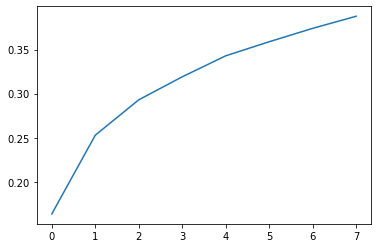

In [9]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()